In [19]:
import os

import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.optimize import minimize_scalar

In [20]:
# compute interception efficiency as a function of receiver height

In [21]:
bat = "cmd /k {tonatiuh} -i={file}".format(
    tonatiuh = os.getcwd() + "/../../../installers/portable/bin/Tonatiuh-Application.exe",
    #tonatiuh = os.getcwd() + "/../../../bin/Tonatiuh-Application.exe",
    file="RadialStagger.tnhpps"
)

def tnRun(data):
    # input
    f = open("in.csv", "w")
    txt = "{heightR},{rays}".format(
        heightR = data,
        rays = 1e6
    )
    f.write(txt)
    f.close()
    
    # simulation
    os.system(bat)
    
    # output
    f = open("out.csv", "r")
    txt = f.read()
    f.close()
    ans = float(txt.split(',')[1])
    return ans

In [22]:
etaMax = tnRun(5.) # saturation
print(etaMax)

0.7600005467305385


In [23]:
# artificial minimum slightly below saturation
def tnFunc(h):
    return ((tnRun(h) - 0.95*etaMax)*100)**2    

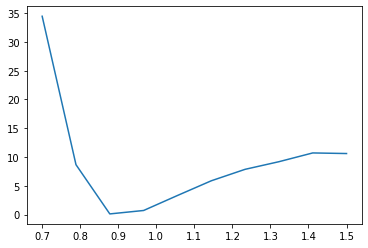

In [24]:
hs = np.linspace(0.7, 1.5, 10)
fs = [tnFunc(h) for h in hs]
plt.plot(hs, fs)

In [25]:
scipy.optimize.show_options(solver="minimize_scalar", method="bounded")

Options
-------
maxiter : int
    Maximum number of iterations to perform.
disp: int, optional
    If non-zero, print messages.
        0 : no message printing.
        1 : non-convergence notification messages only.
        2 : print a message on convergence too.
        3 : print iteration results.
xatol : float
    Absolute error in solution `xopt` acceptable for convergence.


In [26]:
res = minimize_scalar(tnFunc, method='bounded', bounds=(0.7, 1.5), options={'disp':3,'maxiter':20,'xatol':0.01})

 
 Func-count     x          f(x)          Procedure
    1        1.00557      1.66791        initial
    2        1.19443      7.59278        golden
    3       0.888854     0.202191        golden
    4       0.845239      2.12465        parabolic
    5       0.929438    0.0655928        parabolic
    6       0.917193  0.000562679        parabolic
    7       0.913859    0.0667584        parabolic
    8       0.921672  0.000497447        parabolic
    9       0.925005    0.0726451        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.01 )


In [27]:
res.x

0.921671824510876